# Lista de Exercícios 1: Introducão ao Matlab

- Slide Aula 1: https://marofe.github.io/controle-digital/2024/aula1.html
- Slide Lab 1: https://marofe.github.io/controle-digital/2024/lab_aula1.html

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from scipy.linalg import eig

### 1. Implemente um programa para calcular os 100 primeiros termos da sequencia de Fibonacci e plote o resultado usando a função stem.

y[k] = y[k − 1] + y[k − 2], y[0] = 0; y[1] = 1

In [2]:
n = 100

fib_seq = [0] * n
fib_seq[0] = 0
if n > 1:
    fib_seq[1] = 1
    for i in range(2, n):
        fib_seq[i] = fib_seq[i - 1] + fib_seq[i - 2]

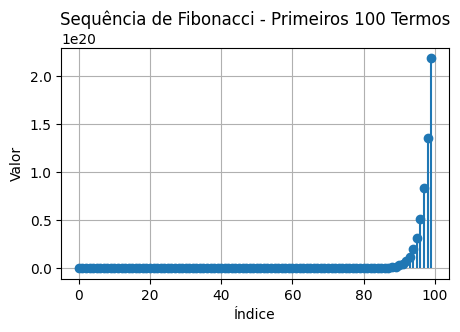

In [3]:
plt.figure(figsize=(5, 3))
plt.stem(range(n), fib_seq, basefmt=" ")
plt.title('Sequência de Fibonacci - Primeiros 100 Termos')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.grid(True)

plt.show()

### 2. Construa os seguintes sinais em tempo discreto (plote usando stem):

(a) Degrau unitario;

(b) Retangulo unit ˆ ario de janela 5;

(c) Impulso unitario;

(d) seno (T = 0.5s);

(e) Sinc (seno normalizado);
    
(f) exponencial decrescente (T = 0.5s);

In [4]:
# Parâmetros
n = np.arange(-10, 11, 1)  # Vetor de tempo discreto
T = 0.5  # Período para seno e exponencial

# Construção dos sinais
# (a) Degrau unitário
degrau_unitario = np.heaviside(n, 1)

# (b) Retângulo unitário de janela 5
retangulo_unitario = np.where((n >= 0) & (n < 5), 1, 0)

# (c) Impulso unitário
impulso_unitario = np.where(n == 0, 1, 0)

# (d) Seno (T = 0.5s)
seno = np.sin(2 * np.pi * n * T)

# (e) Sinc (seno normalizado)
sinc = np.sinc(n * T)

# (f) Exponencial decrescente (T = 0.5s)
exponencial_decrescente = np.exp(-n * T)

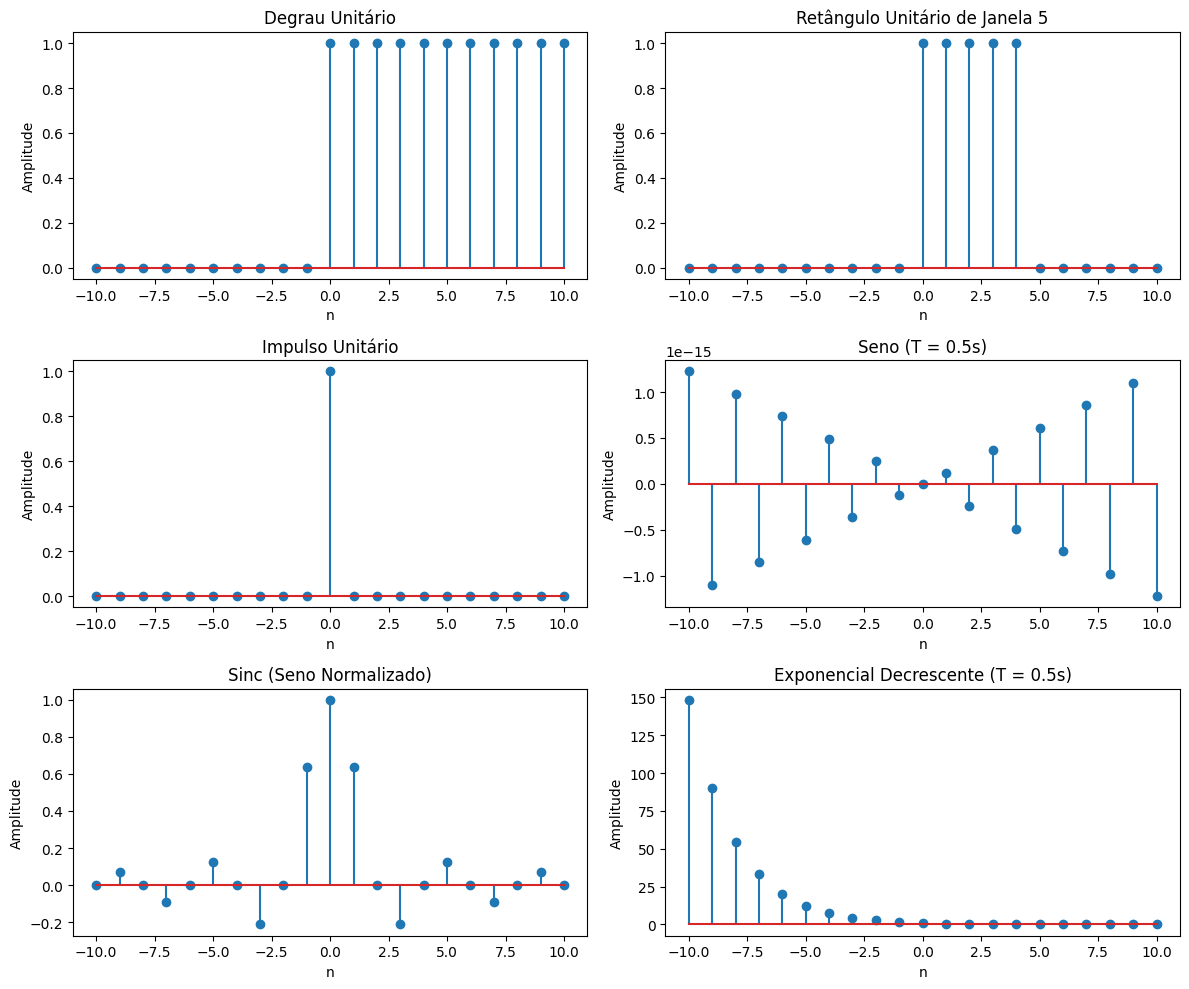

In [5]:
# Plot dos sinais
plt.figure(figsize=(12, 10))

# (a) Degrau unitário
plt.subplot(321)
plt.stem(n, degrau_unitario)
plt.title('Degrau Unitário')
plt.xlabel('n')
plt.ylabel('Amplitude')

# (b) Retângulo unitário de janela 5
plt.subplot(322)
plt.stem(n, retangulo_unitario)
plt.title('Retângulo Unitário de Janela 5')
plt.xlabel('n')
plt.ylabel('Amplitude')

# (c) Impulso unitário
plt.subplot(323)
plt.stem(n, impulso_unitario)
plt.title('Impulso Unitário')
plt.xlabel('n')
plt.ylabel('Amplitude')

# (d) Seno (T = 0.5s)
plt.subplot(324)
plt.stem(n, seno)
plt.title('Seno (T = 0.5s)')
plt.xlabel('n')
plt.ylabel('Amplitude')

# (e) Sinc (seno normalizado)
plt.subplot(325)
plt.stem(n, sinc)
plt.title('Sinc (Seno Normalizado)')
plt.xlabel('n')
plt.ylabel('Amplitude')

# (f) Exponencial decrescente (T = 0.5s)
plt.subplot(326)
plt.stem(n, exponencial_decrescente)
plt.title('Exponencial Decrescente (T = 0.5s)')
plt.xlabel('n')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

### 3. Plot o circulo unitario no plano complexo ( ´ e jθ, θ ∈ [0, 2π]).

In [6]:
# Parâmetros
theta = np.linspace(0, 2 * np.pi, 1000)  # Ângulo θ variando de 0 a 2π
z = np.exp(1j * theta)  # Círculo unitário no plano complexo

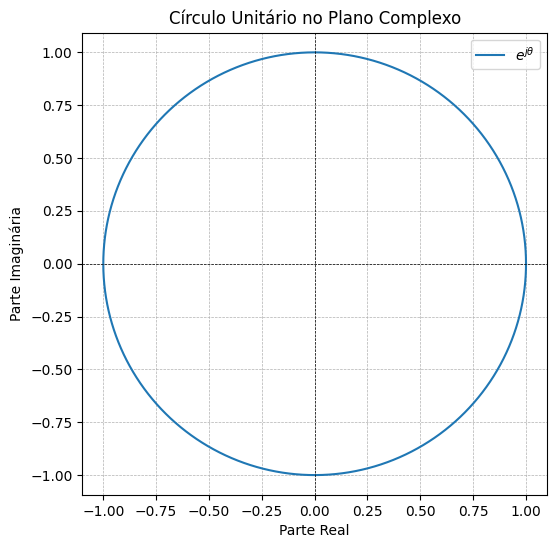

In [7]:
# Plot do círculo unitário
plt.figure(figsize=(6, 6))
plt.plot(np.real(z), np.imag(z), label=r'$e^{j\theta}$')
plt.title('Círculo Unitário no Plano Complexo')
plt.xlabel('Parte Real')
plt.ylabel('Parte Imaginária')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.axis('equal')
plt.legend()
plt.show()

### 4. Dado dois polinomios: p1(x) = 5x3 + 3x2 + 10x + 9 e p2(x) = 15x2 + 4x + 7 Obtenha o produto p1(x)p2(x) usando conv.

In [8]:
# Coeficientes dos polinômios
p1 = [5, 3, 10, 9]  # Coeficientes de p1(x)
p2 = [15, 4, 7]     # Coeficientes de p2(x)

# Produto dos polinômios usando convolução
produto = np.convolve(p1, p2)

# Exibir os coeficientes do polinômio resultante
print("Coeficientes do polinômio resultante:", produto)

# Plot do polinômio resultante
x = np.linspace(-10, 10, 400)
y = np.polyval(produto, x)

Coeficientes do polinômio resultante: [ 75  65 197 196 106  63]


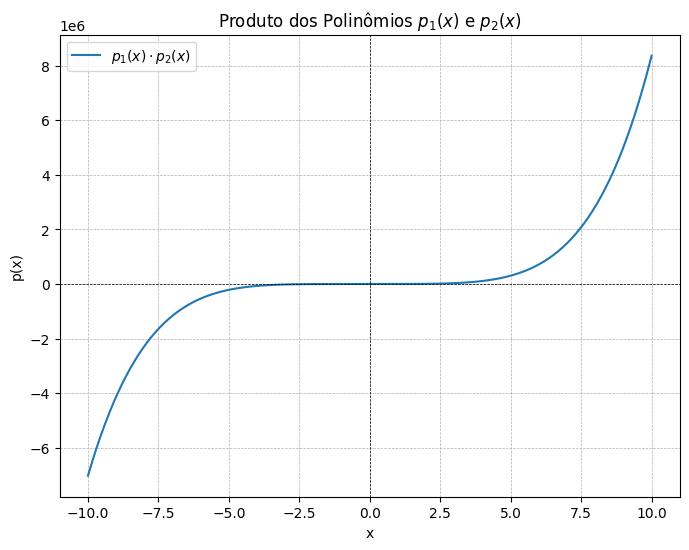

In [9]:
plt.figure(figsize=(8, 6))
plt.plot(x, y, label=r'$p_1(x) \cdot p_2(x)$')
plt.title('Produto dos Polinômios $p_1(x)$ e $p_2(x)$')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend()
plt.show()

### 5. Considere a função de transferência no domínio Z:

Equação: 

G(z) = (0.02268z + 0.02052) / ((z - 0.7408)(z - 1))


(a) Obtenha a função de transferência em malha fechada com realimentação unitária (use `tf` e `feedback`).

(b) Suponha que um controle proporcional com ganho \( K \) seja aplicado ao sistema \( G(z) \). Obtenha os polos em malha fechada com realimentação negativa para \( K = 1 : 10 \) e plote junto com o círculo unitário no plano complexo.

(c) Escolha 3 valores de ganho e plote a resposta ao degrau do sistema em malha fechada usando `stairs`.



In [10]:
# Coeficientes de G(z)
numerator = [0.02268, 0.02052]
denominator = [1, -1.7408, 0.7408]

# Função de transferência G(z)
G = signal.dlti(numerator, denominator)

# (a) Função de transferência em malha fechada com realimentação unitária
num_closed = np.convolve(G.num, [1])  # H = 1
den_closed = np.polyadd(G.den, np.convolve(G.num, [1]))  # 1 + G(z)H(z)
closed_loop_system = signal.dlti(num_closed, den_closed)

# Formatação da expressão da função de transferência
num_str = ' + '.join(f'{coef:.4f}z^{i}' for i, coef in enumerate(closed_loop_system.num[::-1])).replace('z^0', '')
den_str = ' + '.join(f'{coef:.4f}z^{i}' for i, coef in enumerate(closed_loop_system.den[::-1])).replace('z^0', '')

# Impressão da função de transferência formatada
print(f'G(z) = ({num_str}) / ({den_str})')

# (b) Controle proporcional com ganho K
K_values = np.arange(1, 11)
poles_list = []

for K in K_values:
    # Sistema com controle proporcional
    num_K_system = [K * num for num in numerator]
    K_system = signal.dlti(num_K_system, denominator)
    
    # Sistema em malha fechada com realimentação negativa
    num_closed_with_K = np.convolve(K_system.num, [1])  # H = 1
    den_closed_with_K = np.polyadd(K_system.den, np.convolve(K_system.num, [1]))  # 1 + G(z)H(z)
    closed_loop_with_K = signal.dlti(num_closed_with_K, den_closed_with_K)
    
    # Obter os polos do sistema em malha fechada
    poles = np.roots(closed_loop_with_K.den)
    poles_list.append(poles)

# (c) Resposta ao degrau para 3 valores de ganho
gain_values = [1, 5, 10]
responses = {}

for gain in gain_values:
    # Sistema com ganho específico
    num_gain_system = [gain * num for num in numerator]
    gain_system = signal.dlti(num_gain_system, denominator)
    
    # Sistema em malha fechada com realimentação negativa
    num_closed_gain_system = np.convolve(gain_system.num, [1])  # H = 1
    den_closed_gain_system = np.polyadd(gain_system.den, np.convolve(gain_system.num, [1]))  # 1 + G(z)H(z)
    closed_loop_gain_system = signal.dlti(num_closed_gain_system, den_closed_gain_system)
    
    # Obter a resposta ao degrau
    t, y = signal.dstep(closed_loop_gain_system)
    t = np.array(t).flatten()
    y = np.array(y).flatten()
    
    responses[gain] = (t, y)




G(z) = (0.0205 + 0.0227z^1) / (0.7613 + -1.7181z^1 + 1.0000z^2)


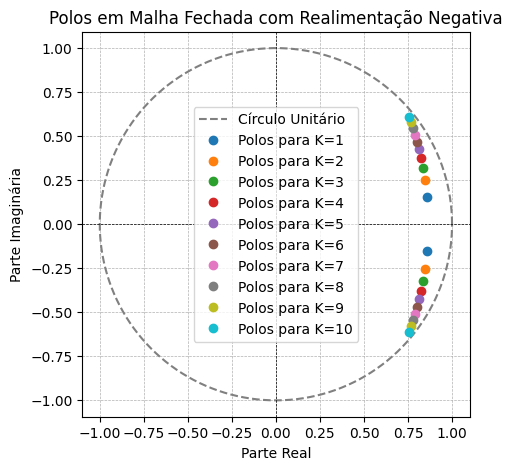

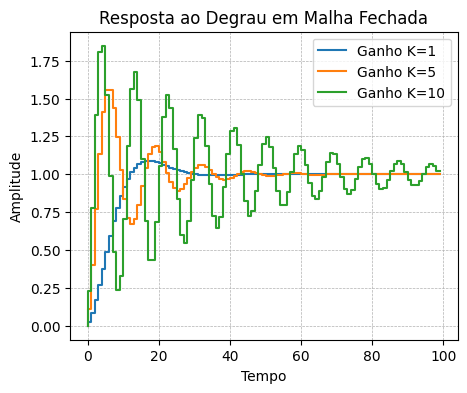

In [11]:
# (b) Plot dos polos e círculo unitário
theta = np.linspace(0, 2 * np.pi, 1000)
circle = np.exp(1j * theta)

plt.figure(figsize=(5, 5))
plt.plot(np.real(circle), np.imag(circle), linestyle='--', color='gray', label='Círculo Unitário')

for idx, poles in enumerate(poles_list):
    plt.plot(np.real(poles), np.imag(poles), 'o', label=f'Polos para K={K_values[idx]}')

plt.title('Polos em Malha Fechada com Realimentação Negativa')
plt.xlabel('Parte Real')
plt.ylabel('Parte Imaginária')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend()
plt.axis('equal')
plt.show()

# (c) Resposta ao degrau para 3 valores de ganho
plt.figure(figsize=(5, 4))

for gain, (t, y) in responses.items():
    plt.step(t, y, label=f'Ganho K={gain}')

plt.title('Resposta ao Degrau em Malha Fechada')
plt.xlabel('Tempo')
plt.ylabel('Amplitude')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend()
plt.show()


### 6. Considere o sistema em espaço de estados dado por:

x(k + 1) = Ax(k) + Bu(k)

em que:

A = \begin{bmatrix}
1 & T \\
0 & 1
\end{bmatrix}, \quad B = \begin{bmatrix}
1 \\
0
\end{bmatrix}

e \( T = 0.5 \) s é o tempo de amostragem do sistema. Considere \( x[0] = \begin{bmatrix} 0 & 1 \end{bmatrix}^T \) e \( u(k) = \text{randn} \).

(a) Calcule \( x(k) \) para \( k = 0 : 500 \) e plote o resultado usando `stem`.

(b) Calcule os autovalores de \( A \) e plote no plano complexo junto com o círculo unitário.


In [12]:
# Parâmetros do sistema
T = 0.5
A = np.array([[1, T], [0, 1]])
B = np.array([[T], [0]])
x0 = np.array([0, 1])
n_steps = 500

# Gerar entrada aleatória
np.random.seed(0)  # Para reprodutibilidade
u = np.random.randn(n_steps + 1)

# Inicializar x e calcular x(k) para k = 0 : 500
x = np.zeros((n_steps + 1, 2))
x[0] = x0

for k in range(n_steps):
    x[k + 1] = A @ x[k] + B.flatten() * u[k]

# Calcular os autovalores de A
eigenvalues, _ = eig(A)

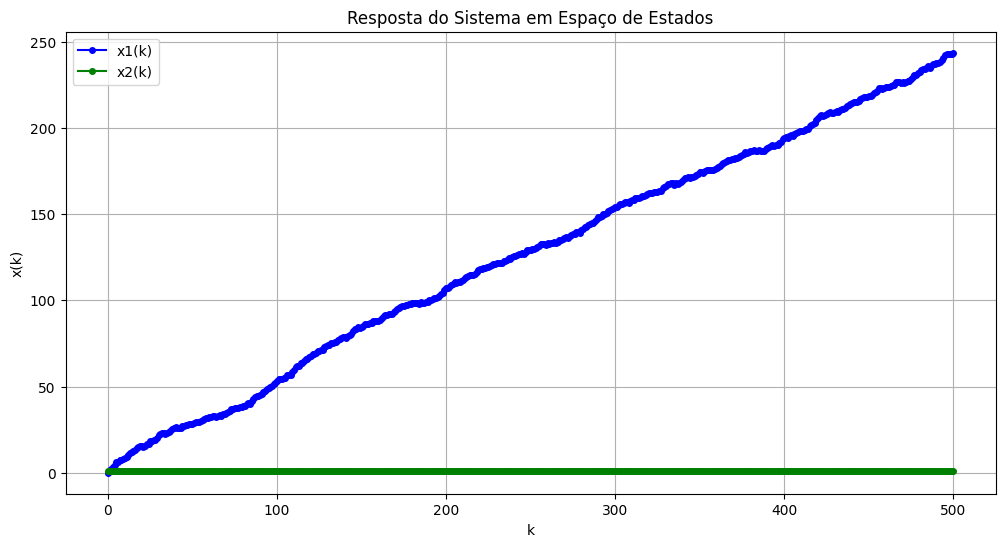

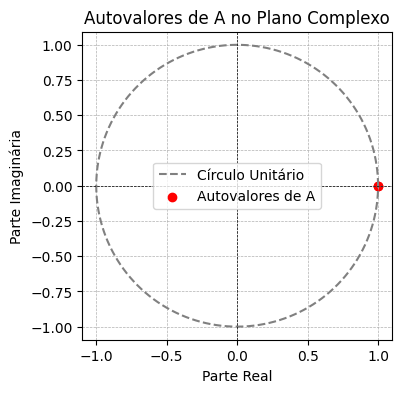

In [13]:
# (a)
plt.figure(figsize=(12, 6))
plt.plot(range(n_steps + 1), x[:, 0], label='x1(k)', color='b', marker='o', markersize=4, linestyle='-')
plt.plot(range(n_steps + 1), x[:, 1], label='x2(k)', color='g', marker='o', markersize=4, linestyle='-')
plt.title('Resposta do Sistema em Espaço de Estados')
plt.xlabel('k')
plt.ylabel('x(k)')
plt.grid(True)
plt.legend()
plt.show()

# (b) Plotar os autovalores no plano complexo junto com o círculo unitário
theta = np.linspace(0, 2 * np.pi, 1000)
circle = np.exp(1j * theta)

plt.figure(figsize=(4, 4))
plt.plot(np.real(circle), np.imag(circle), linestyle='--', color='gray', label='Círculo Unitário')
plt.scatter(np.real(eigenvalues), np.imag(eigenvalues), color='red', label='Autovalores de A')
plt.title('Autovalores de A no Plano Complexo')
plt.xlabel('Parte Real')
plt.ylabel('Parte Imaginária')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend()
plt.axis('equal')
plt.show()